# Modeling a Magneto Rheological Damper Device

Note: The example shown in this notebook is taken from the companion book [Nonlinear System Identification and Forecasting: Theory and Practice with SysIdentPy](https://sysidentpy.org/book/0-Preface/).

The memory effects between quasi-static input and output make the modeling of hysteretic systems very difficult. Physics-based models are often used to describe the hysteresis loops, but these models usually lack the simplicity and efficiency required in practical applications involving system characterization, identification, and control. As detailed in [Martins, S. A. M. and Aguirre, L. A. - Sufficient conditions for rate-independent hysteresis in autoregressive identified models](https://www.sciencedirect.com/science/article/abs/pii/S0888327015005968), NARX models have proven to be a feasible choice to describe the hysteresis loops. See Chapter 8 for a detailed background. However, even considering the sufficient conditions for rate independent hysteresis representation, classical structure selection algorithms fails to return a model with decent performance and the user needs to set a multi-valued function to ensure the occurrence of the bounding structure $\mathcal{H}$ ([Martins, S. A. M. and Aguirre, L. A. - Sufficient conditions for rate-independent hysteresis in autoregressive identified models](https://www.sciencedirect.com/science/article/abs/pii/S0888327015005968)).

Even though some progress has been made, previous work has been limited to models with a single equilibrium point. The present case study aims to present new prospects in the model structure selection of hysteretic systems regarding the cases where the models have multiple inputs and it is not restricted concerning the number of equilibrium points. For that, the MetaMSS algorithm will be used to build a model for a magneto-rheological damper (MRD) considering the mentioned sufficient conditions.

### A Brief description of the Bouc-Wen model of magneto-rheological damper device

The data used in this study-case is the Bouc-Wen model ([Bouc, R - Forced Vibrations of a Mechanical System with Hysteresis](https://www.scirp.org/reference/referencespapers?referenceid=726819)), ([Wen, Y. X. - Method for Random Vibration of Hysteretic Systems](https://ascelibrary.org/doi/10.1061/JMCEA3.0002106)) of an MRD whose schematic diagram is shown in the figure below.


![](https://github.com/wilsonrljr/sysidentpy-data/blob/4085901293ba5ed5674bb2911ef4d1fa20f3438d/book/assets/bouc_wen.png?raw=true)
> The model for a magneto-rheological damper proposed by [Spencer, B. F. and Sain, M. K. - Controlling buildings: a new frontier in feedback](https://ieeexplore.ieee.org/document/642972).

The general form of the Bouc-Wen model can be described as ([Spencer, B. F. and Sain, M. K. - Controlling buildings: a new frontier in feedback](https://ieeexplore.ieee.org/document/642972)):

$$
\begin{equation}
\dfrac{dz}{dt} = g\left[x,z,sign\left(\dfrac{dx}{dt}\right)\right]\dfrac{dx}{dt},
\end{equation}
$$

where $z$ is the hysteretic model output, $x$ the input and $g[\cdot]$ a nonlinear function of $x$, $z$ and $sign (dx/dt)$. ([Spencer, B. F. and Sain, M. K. - Controlling buildings: a new frontier in feedback](https://ieeexplore.ieee.org/document/642972)) proposed the following phenomenological model for the aforementioned device:

$$
\begin{align}
f&= c_1\dot{\rho}+k_1(x-x_0),\nonumber\\
\dot{\rho}&=\dfrac{1}{c_0+c_1}[\alpha z+c_0\dot{x}+k_0(x-\rho)],\nonumber\\
\dot{z}&=-\gamma|\dot{x}-\dot{\rho}|z|z|^{n-1}-\beta(\dot{x}-\dot{\rho})|z|^n+A(\dot{x}-\dot{\rho}),\nonumber\\
\alpha&=\alpha_a+\alpha_bu_{bw},\nonumber\\
c_1&=c_{1a}+c_{1b}u_{bw},\nonumber\\
c_0&=c_{0a}+c_{0b}u_{bw},\nonumber\\
\dot{u}_{bw}&=-\eta(u_{bw}-E).
\end{align}
$$

where $f$ is the damping force, $c_1$ and $c_0$ represent the viscous coefficients, $E$ is the input voltage, $x$ is the displacement and $\dot{x}$ is the velocity of the model. The parameters of the system (see table below) were taken from [Leva, A. and Piroddi, L. - NARX-based technique for the modelling of magneto-rheological damping devices](https://iopscience.iop.org/article/10.1088/0964-1726/11/1/309).

| Parameter  | Value          | Parameter | Value        |
|------------|----------------|-----------|--------------|
| $c_{0_a}$  | $20.2 \, N \, s/cm$  | $\alpha_{a}$  | $44.9 \, N/cm$  |
| $c_{0_b}$  | $2.68 \, N \, s/cm \, V$ | $\alpha_{b}$  | $638 \, N/cm$   |
| $c_{1_a}$  | $350 \, N \, s/cm$   | $\gamma$      | $39.3 \, cm^{-2}$ |
| $c_{1_b}$  | $70.7 \, N \, s/cm \, V$  | $\beta$       | $39.3 \, cm^{-2}$ |
| $k_{0}$    | $15 \, N/cm$    | $n$           | $2$          |
| $k_{1}$    | $5.37 \, N/cm$   | $\eta$       | $251 \, s^{-1}$ |
| $x_{0}$    | $0 \, cm$      | $A$           | $47.2$       |

For this particular study, both displacement and voltage inputs, $x$ and $E$, respectively, were generated by filtering a white Gaussian noise sequence using a Blackman-Harris FIR filter with $6$Hz cutoff frequency. The integration step-size was set to $h = 0.002$, following the procedures described in [Martins, S. A. M. and Aguirre, L. A. - Sufficient conditions for rate-independent hysteresis in autoregressive identified models](https://www.sciencedirect.com/science/article/abs/pii/S0888327015005968). These procedures are for identification purposes only since the inputs of a MRD could have several different characteristics.

The data used in this example is provided by the Professor Samir Angelo Milani Martins.

The challenges are:

- it possesses a nonlinearity featuring memory, i.e. a dynamic nonlinearity;
- the nonlinearity is governed by an internal variable z(t), which is not measurable;
- the nonlinear functional form in the Bouc Wen equation is nonlinear in the parameter;
- the nonlinear functional form in the Bouc Wen equation does not admit a finite Taylor series expansion because of the presence of absolute values

### Required Packages and Versions

To ensure that you can replicate this case study, it is essential to use specific versions of the required packages. Below is a list of the packages along with their respective versions needed for running the case studies effectively.

To install all the required packages, you can create a `requirements.txt` file with the following content:

```
sysidentpy==0.4.0
pandas==2.2.2
numpy==1.26.0
matplotlib==3.8.4
scikit-learn==1.4.2
```

Then, install the packages using:
```
pip install -r requirements.txt
```

- Ensure that you use a virtual environment to avoid conflicts between package versions.
- Versions specified are based on compatibility with the code examples provided. If you are using different versions, some adjustments in the code might be necessary.

### SysIdentPy Configuration


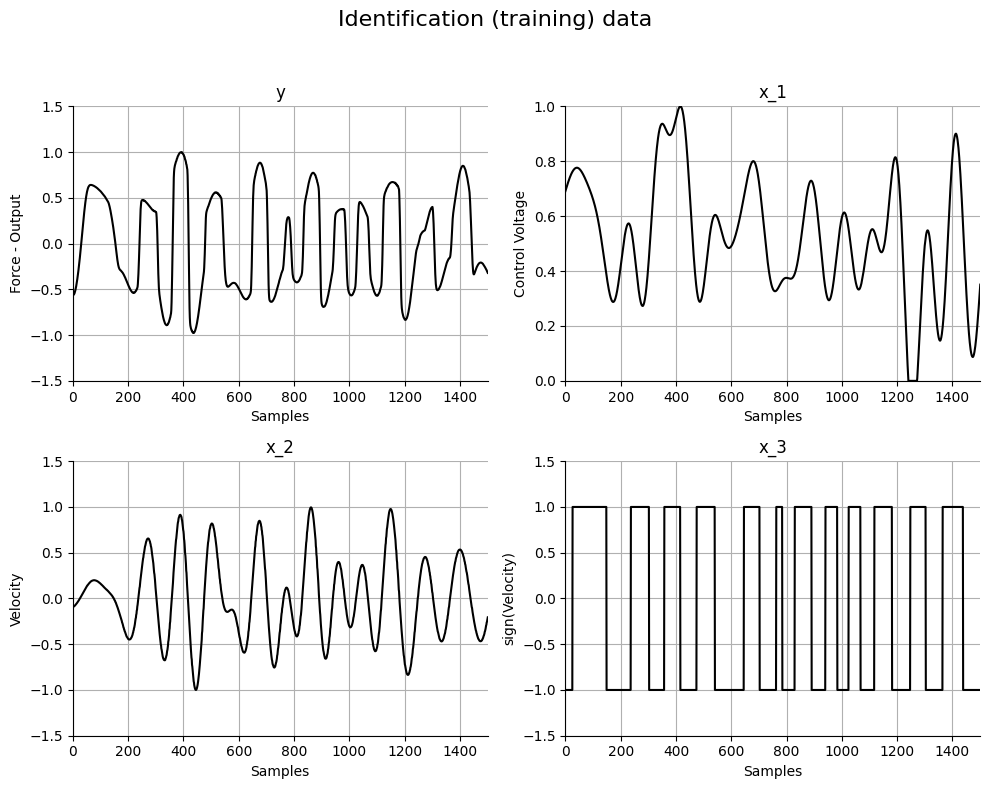

In [3]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function import Polynomial
from sysidentpy.utils.display_results import results
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.plotting import plot_results

df = pd.read_csv(
    "https://raw.githubusercontent.com/wilsonrljr/sysidentpy-data/refs/heads/main/datasets/bouc_wen/boucwen_histeretic_system.csv"
)
scaler_x = MaxAbsScaler()
scaler_y = MaxAbsScaler()

init = 400
x_train = df[["E", "v"]].iloc[init : df.shape[0] // 2, :]
x_train["sign_v"] = np.sign(df["v"])
x_train = scaler_x.fit_transform(x_train)

x_test = df[["E", "v"]].iloc[df.shape[0] // 2 + 1 : df.shape[0] - init, :]
x_test["sign_v"] = np.sign(df["v"])
x_test = scaler_x.transform(x_test)

y_train = df[["f"]].iloc[init : df.shape[0] // 2, :].values.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)

y_test = (
    df[["f"]].iloc[df.shape[0] // 2 + 1 : df.shape[0] - init, :].values.reshape(-1, 1)
)
y_test = scaler_y.transform(y_test)

# Plotting the data
plt.figure(figsize=(10, 8))
plt.suptitle("Identification (training) data", fontsize=16)

plt.subplot(221)
plt.plot(y_train, "k")
plt.ylabel("Force - Output")
plt.xlabel("Samples")
plt.title("y")
plt.grid()
plt.axis([0, 1500, -1.5, 1.5])

plt.subplot(222)
plt.plot(x_train[:, 0], "k")
plt.ylabel("Control Voltage")
plt.xlabel("Samples")
plt.title("x_1")
plt.grid()
plt.axis([0, 1500, 0, 1])

plt.subplot(223)
plt.plot(x_train[:, 1], "k")
plt.ylabel("Velocity")
plt.xlabel("Samples")
plt.title("x_2")
plt.grid()
plt.axis([0, 1500, -1.5, 1.5])

plt.subplot(224)
plt.plot(x_train[:, 2], "k")
plt.ylabel("sign(Velocity)")
plt.xlabel("Samples")
plt.title("x_3")
plt.grid()
plt.axis([0, 1500, -1.5, 1.5])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Let's check how is the histeretic behavior considering each input:

Text(0, 0.5, 'y - Force')

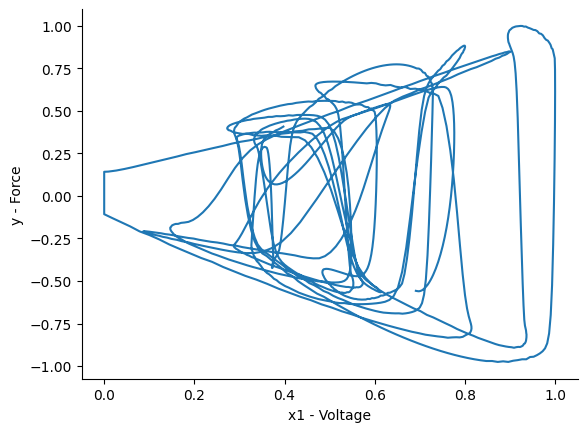

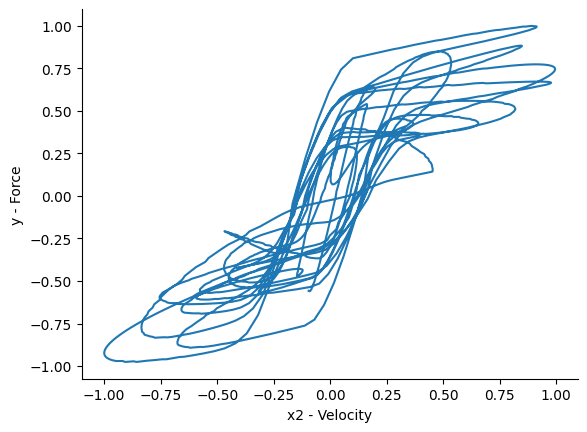

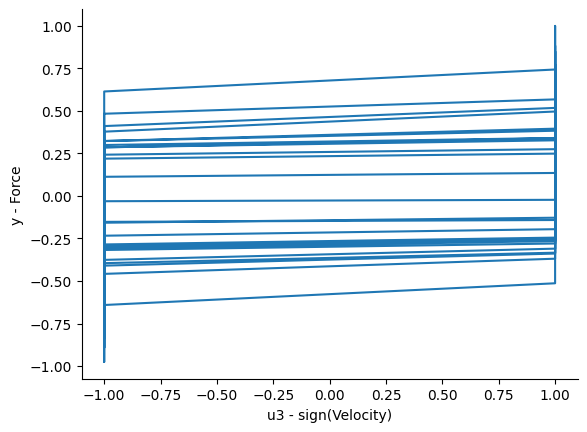

In [6]:
plt.figure()
plt.plot(x_train[:, 0], y_train)
plt.xlabel("x1 - Voltage")
plt.ylabel("y - Force")

plt.figure()
plt.plot(x_train[:, 1], y_train)
plt.xlabel("x2 - Velocity")
plt.ylabel("y - Force")

plt.figure()
plt.plot(x_train[:, 2], y_train)
plt.xlabel("u3 - sign(Velocity)")
plt.ylabel("y - Force")

Now, we can just build a NARX model:

0.04510435472905795


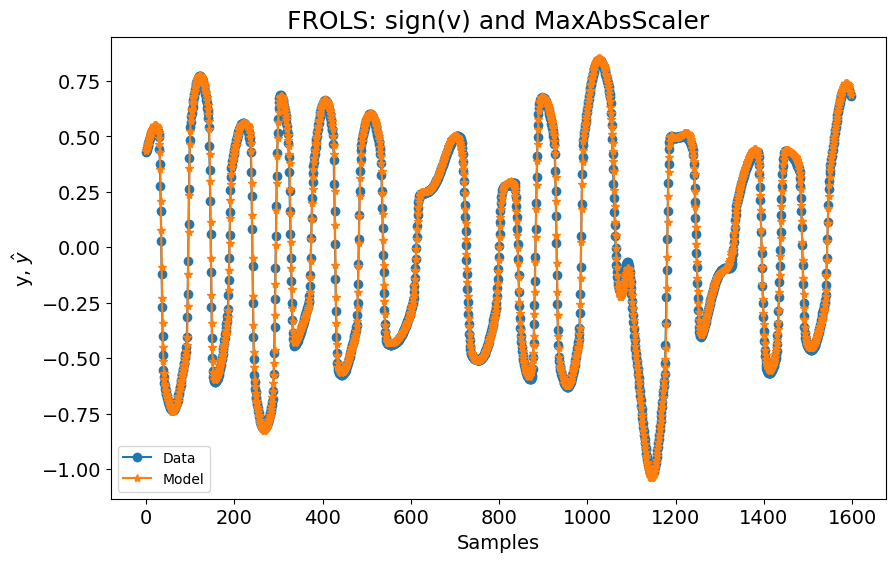

In [7]:
basis_function = Polynomial(degree=3)
model = FROLS(
    xlag=[[1], [1], [1]],
    ylag=1,
    basis_function=basis_function,
    estimator=LeastSquares(),
    info_criteria="aic",
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test[: model.max_lag :, :])
rrse = root_relative_squared_error(y_test[model.max_lag :], yhat[model.max_lag :])
print(rrse)
plot_results(
    y=y_test[model.max_lag :],
    yhat=yhat[model.max_lag :],
    n=10000,
    title="FROLS: sign(v) and MaxAbsScaler",
)

If we remove the `sign(v)` input and try to build a NARX model using the same configuration, the model diverge, as can be seen in the following figure:

nan


c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\narmax_base.py:724: RuntimeWarning: overflow encountered in power
  regressor_value[j] = np.prod(np.power(raw_regressor, model_exponent))
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\metrics\_regression.py:216: RuntimeWarning: overflow encountered in square
  numerator = np.sum(np.square((yhat - y)))


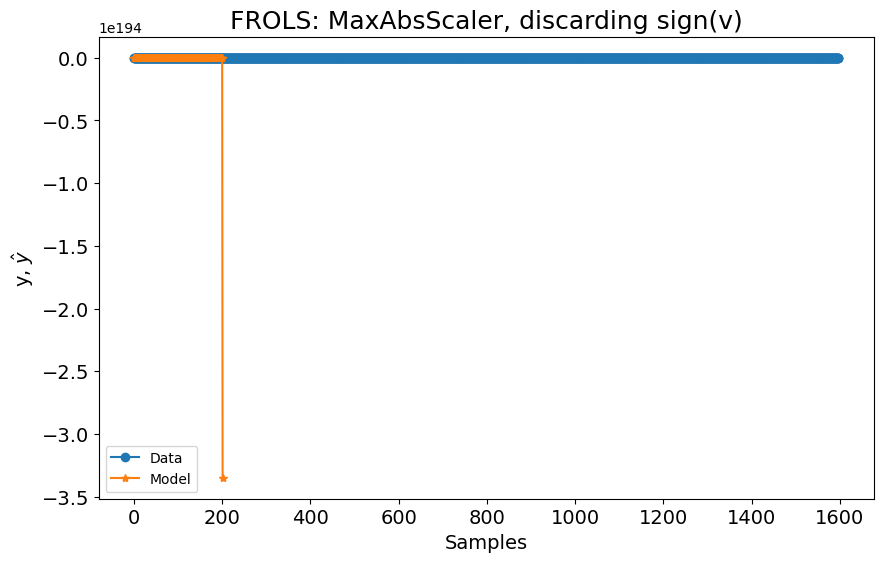

In [8]:
basis_function = Polynomial(degree=3)
model = FROLS(
    xlag=[[1], [1]],
    ylag=1,
    basis_function=basis_function,
    estimator=LeastSquares(),
    info_criteria="aic",
)

model.fit(X=x_train[:, :2], y=y_train)
yhat = model.predict(X=x_test[:, :2], y=y_test[: model.max_lag :, :])
rrse = root_relative_squared_error(y_test[model.max_lag :], yhat[model.max_lag :])
print(rrse)
plot_results(
    y=y_test[model.max_lag :],
    yhat=yhat[model.max_lag :],
    n=10000,
    title="FROLS: MaxAbsScaler, discarding sign(v)",
)

If we use the `MetaMSS` algorithm instead, the results are better.

c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\narmax_base.py:724: RuntimeWarning: overflow encountered in power
  regressor_value[j] = np.prod(np.power(raw_regressor, model_exponent))
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\model_structure_selection\meta_model_structure_selection.py:453: RuntimeWarning: overflow encountered in square
  sum_of_squared_residues = np.sum(residues**2)
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\metrics\_regression.py:216: RuntimeWarning: overflow encountered in square
  numerator = np.sum(np.square((yhat - y)))
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\numpy\linalg\linalg.py:2590: RuntimeWarning: divide by zero encountered in power
  absx **= ord
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs

0.24685651932553157


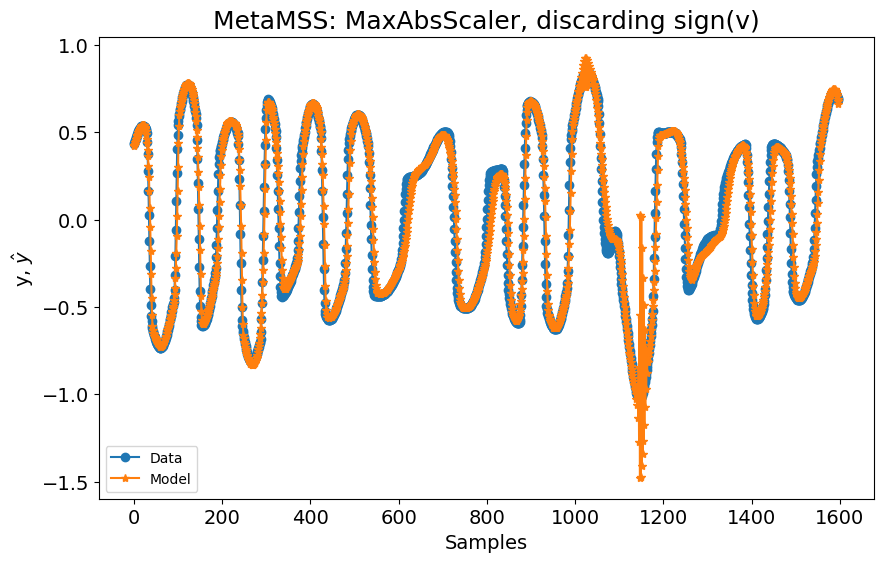

In [9]:
from sysidentpy.model_structure_selection import MetaMSS

basis_function = Polynomial(degree=3)
model = MetaMSS(
    xlag=[[1], [1]],
    ylag=1,
    basis_function=basis_function,
    estimator=LeastSquares(),
    random_state=42,
)

model.fit(X=x_train[:, :2], y=y_train)
yhat = model.predict(X=x_test[:, :2], y=y_test[: model.max_lag :, :])
rrse = root_relative_squared_error(y_test[model.max_lag :], yhat[model.max_lag :])
print(rrse)
plot_results(
    y=y_test[model.max_lag :],
    yhat=yhat[model.max_lag :],
    n=10000,
    title="MetaMSS: MaxAbsScaler, discarding sign(v)",
)

However, when the output of the system reach its minimum value, the model oscillate

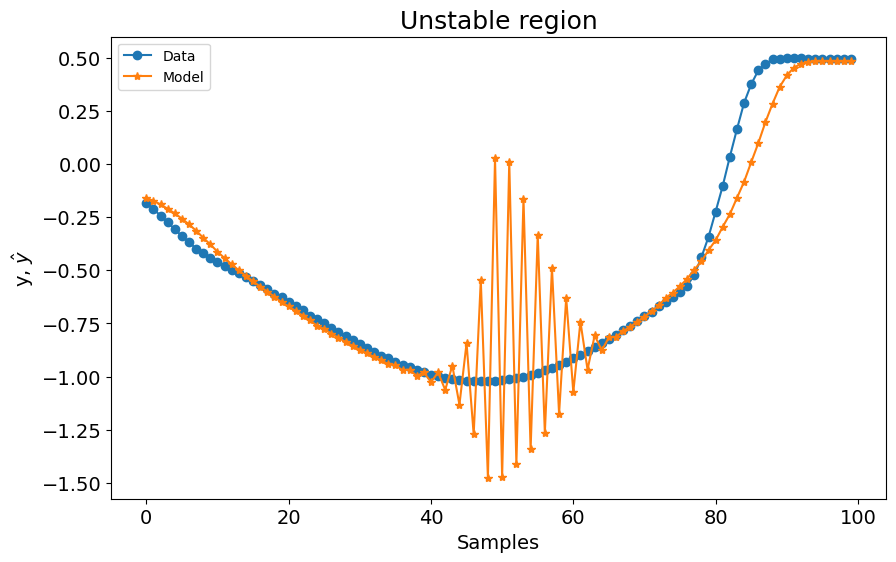

In [10]:
plot_results(
    y=y_test[1100:1200], yhat=yhat[1100:1200], n=10000, title="Unstable region"
)

If we add the `sign(v)` input again and use `MetaMSS`, the results are very close to the `FROLS` algorithm with all inputs

c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\parameter_estimation\estimators.py:75: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\narmax_base.py:724: RuntimeWarning: overflow encountered in power
  regressor_value[j] = np.prod(np.power(raw_regressor, model_exponent))
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\sysidentpy\model_structure_selection\meta_model_structure_selection.py:453: RuntimeWarning: overflow encountered in square
  sum_of_squared_residues = np.sum(residues**2)
c:\Users\wilso\miniconda3\envs\sysidentpyv04\Lib\site-packages\numpy\linalg\linalg.py:2590: RuntimeWarning: divide by zero encountered in power
  absx **= ord


0.055422497807759194


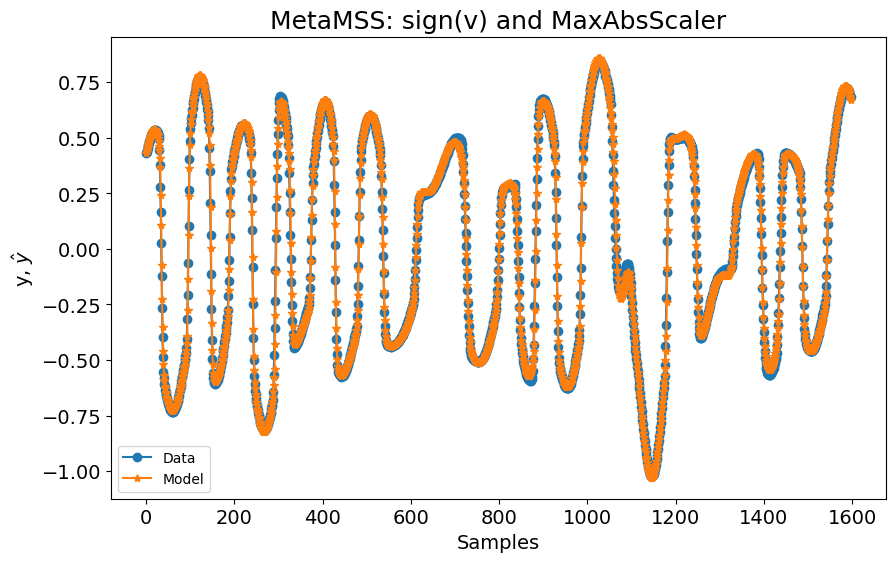

In [11]:
basis_function = Polynomial(degree=3)
model = MetaMSS(
    xlag=[[1], [1], [1]],
    ylag=1,
    basis_function=basis_function,
    estimator=LeastSquares(),
    random_state=42,
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test[: model.max_lag :, :])
rrse = root_relative_squared_error(y_test[model.max_lag :], yhat[model.max_lag :])
print(rrse)
plot_results(
    y=y_test[model.max_lag :],
    yhat=yhat[model.max_lag :],
    n=10000,
    title="MetaMSS: sign(v) and MaxAbsScaler",
)

This case will also highlight the significance of data scaling. Previously, we used the `MaxAbsScaler` method, which resulted in great models when using the `sign(v)` inputs, but also resulted in unstable models when removing that input feature. When scaling is applied using `MinMaxScaler`, however, the overall stability of the results improves, and the model does not diverge, even when the `sign(v)` input is removed, using the `FROLS` algorithm.

The user can get the results bellow by just changing the data scaling method using

In [12]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

and running the each model again. That is the only change to improve the results.

![](https://github.com/wilsonrljr/sysidentpy-data/blob/4085901293ba5ed5674bb2911ef4d1fa20f3438d/book/assets/bw_r4.png?raw=true)
> FROLS: with `sign(v)` and `MinMaxScaler`. RMSE: 0.1159

![](https://github.com/wilsonrljr/sysidentpy-data/blob/4085901293ba5ed5674bb2911ef4d1fa20f3438d/book/assets/bw_r5.png?raw=true)
FROLS: discarding `sign(v)` and using `MinMaxScaler`. RMSE: 0.1639

![](https://github.com/wilsonrljr/sysidentpy-data/blob/4085901293ba5ed5674bb2911ef4d1fa20f3438d/book/assets/bw_r6.png?raw=true)
> MetaMSS: discarding `sign(v)` and using `MinMaxScaler`. RMSE: 0.1762

![](https://github.com/wilsonrljr/sysidentpy-data/blob/4085901293ba5ed5674bb2911ef4d1fa20f3438d/book/assets/bw_r7.png?raw=true)
> MetaMSS: including `sign(v)` and using `MinMaxScaler`. RMSE: 0.0694

In contrast, the MetaMSS method returned the best model overall, but not better than the best `FROLS` method using `MaxAbsScaler`.

Here is the predicted histeretic loop:

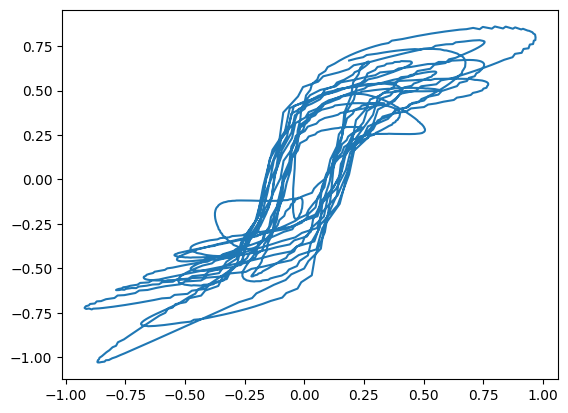

In [13]:
plt.plot(x_test[:, 1], yhat)